In [2]:
import dask
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline

In [7]:
%%time
pd_data=pd.read_csv("data/full_date.csv")

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 25.6 ms


In [107]:
pd_data.head(5)

,data_date
0,2017.3.1
1,2017.3.2
2,2017.3.3
3,2017.3.4
4,2017.3.5


In [3]:
%%time
full_date=dd.read_csv("data/full_date.csv")

CPU times: user 15.6 ms, sys: 15.6 ms, total: 31.2 ms
Wall time: 31.3 ms


In [4]:
full_date["data_date"] = dd.to_datetime(full_date.data_date)

In [5]:
full_date.compute()

,data_date
0,2017-03-01
1,2017-03-02
2,2017-03-03
3,2017-03-04
4,2017-03-05
...,...
376,2018-03-12
377,2018-03-13
378,2018-03-14
379,2018-03-15


In [116]:
full_date.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data_date  381 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 KB


In [13]:
os.listdir("data/")

['full_date.csv',
 'goodsale.csv',
 'goodsdaily.csv',
 'goodsinfo.csv',
 'goods_promote_price.csv',
 'goods_sku_relation.csv',
 'marketing.csv',
 'submit_example.csv']

In [14]:
from glob import glob
filenames=sorted(glob(os.path.join("data","*.csv")))

In [15]:
filenames

['data/full_date.csv',
 'data/goods_promote_price.csv',
 'data/goods_sku_relation.csv',
 'data/goodsale.csv',
 'data/goodsdaily.csv',
 'data/goodsinfo.csv',
 'data/marketing.csv',
 'data/submit_example.csv']

In [6]:
%%time
promote_goods=dd.read_csv("data/goods_promote_price.csv", dtype="unicode")

CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 32 ms


In [7]:
promote_goods["data_date"] = dd.to_datetime(promote_goods.data_date)

In [8]:
promote_goods.compute()

,data_date,goods_id,shop_price,promote_price,promote_start_time,promote_end_time
0,2018-01-29,GBLrYn,289,0,1970.1.1 08:00,1970.1.1 08:00
1,2018-01-29,GfrkEb,17.99,0,1970.1.1 08:00,1970.1.1 08:00
2,2018-01-29,GD8pMl,412,0,1970.1.1 08:00,1970.1.1 08:00
3,2018-01-29,Gfid4P,87,0,1970.1.1 08:00,1970.1.1 08:00
4,2018-01-29,Gzjk0i,43.99,0,1970.1.1 08:00,1970.1.1 08:00
...,...,...,...,...,...,...
1048570,2018-03-07,GhltHS,10.99,0,1970.1.1 08:00,1970.1.1 08:00
1048571,2018-03-07,GGUjIf,16.99,6.99,2017.12.28 10:00,2018.3.28 18:00
1048572,2018-03-07,GS3sLX,191,172,2018.3.1 19:00,2018.3.9 18:00
1048573,2018-03-07,G52r6v,13.99,0,1970.1.1 08:00,1970.1.1 08:00


In [23]:
%%time
sku_relation=dd.read_csv("data/goods_sku_relation.csv")

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 27.5 ms


In [31]:
sku_relation.compute().shape

(3245170, 2)

In [29]:
sku_relation.dtypes

sku_id      object
goods_id    object
dtype: object

In [25]:
sku_relation.head()

,sku_id,goods_id
0,SKi4vm9R,Gd4qzR
1,SKoqfFbc,GKokDh
2,SKYR0sAQ,GlOIaX
3,SK78Nimt,GJYEoa
4,SKP3CRsW,GJYEoa


In [24]:
goods_id = sku_relation.groupby('goods_id')['sku_id'].nunique()

In [30]:
a=sku_relation.describe(include=['object', 'category']).compute()

In [31]:
a.head()

,sku_id,goods_id
unique,3245170,423453
count,3245170,3245170
top,SK012CKt,GAnJO3
freq,1,266


In [9]:
%%time
goodsale=dd.read_csv("data/goodsale.csv", dtype='unicode')

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 26.5 ms


In [10]:
goodsale["data_date"] = dd.to_datetime(goodsale.data_date)

In [11]:
goodsale.compute().shape

(7325028, 6)

In [17]:
goodsale=goodsale.sort_values(by='data_date').reset_index()

In [18]:
goodsale.head(3)

,index,data_date,goods_id,sku_id,goods_num,goods_price,orginal_shop_price
0,1296476,2017-03-01,GE53KV,SKOiDyda,1,15.67,20.99
1,1272945,2017-03-01,GlfE68,SKju6QPZ,2,3.99,12.99
2,1093576,2017-03-01,GERawC,SKTv2s04,12,21.99,32.99


In [19]:
goodsale = goodsale.drop('index', axis=1)

In [21]:
goodsale.columns

Index(['data_date', 'goods_id', 'sku_id', 'goods_num', 'goods_price',
       'orginal_shop_price'],
      dtype='object')

In [87]:
goodsale.sample(frac=0.01).compute()

,data_date,goods_id,sku_id,goods_num,goods_price,orginal_shop_price
298183,2017-10-12,GGH3ey,SK8fmIWE,8,5.99,10.99
734629,2017-04-29,GX2qYG,SKiUjy3g,1,6.99,9.99
1565109,2017-09-15,Gq8YK7,SKO8Hnlg,1,12.99,21.99
1351892,2017-07-01,G51eFY,SKNcj8Lw,3,4.99,8.99
457210,2018-01-08,GyeuaL,SK952OtW,1,11.99,17.99
...,...,...,...,...,...,...
686466,2017-10-17,GXHlkh,SKuPyTja,3,6.99,13.99
307525,2017-06-01,GXDCW1,SKw93E1P,7,4.96,7.99
604063,2018-01-07,GAbPuM,SKlkA5ax,1,1.99,4.99
286943,2018-01-25,GXArtf,SK1PC2X5,1,8.99,13.99


CPU times: user 46.9 ms, sys: 1.11 s, total: 1.16 s
Wall time: 6.54 s


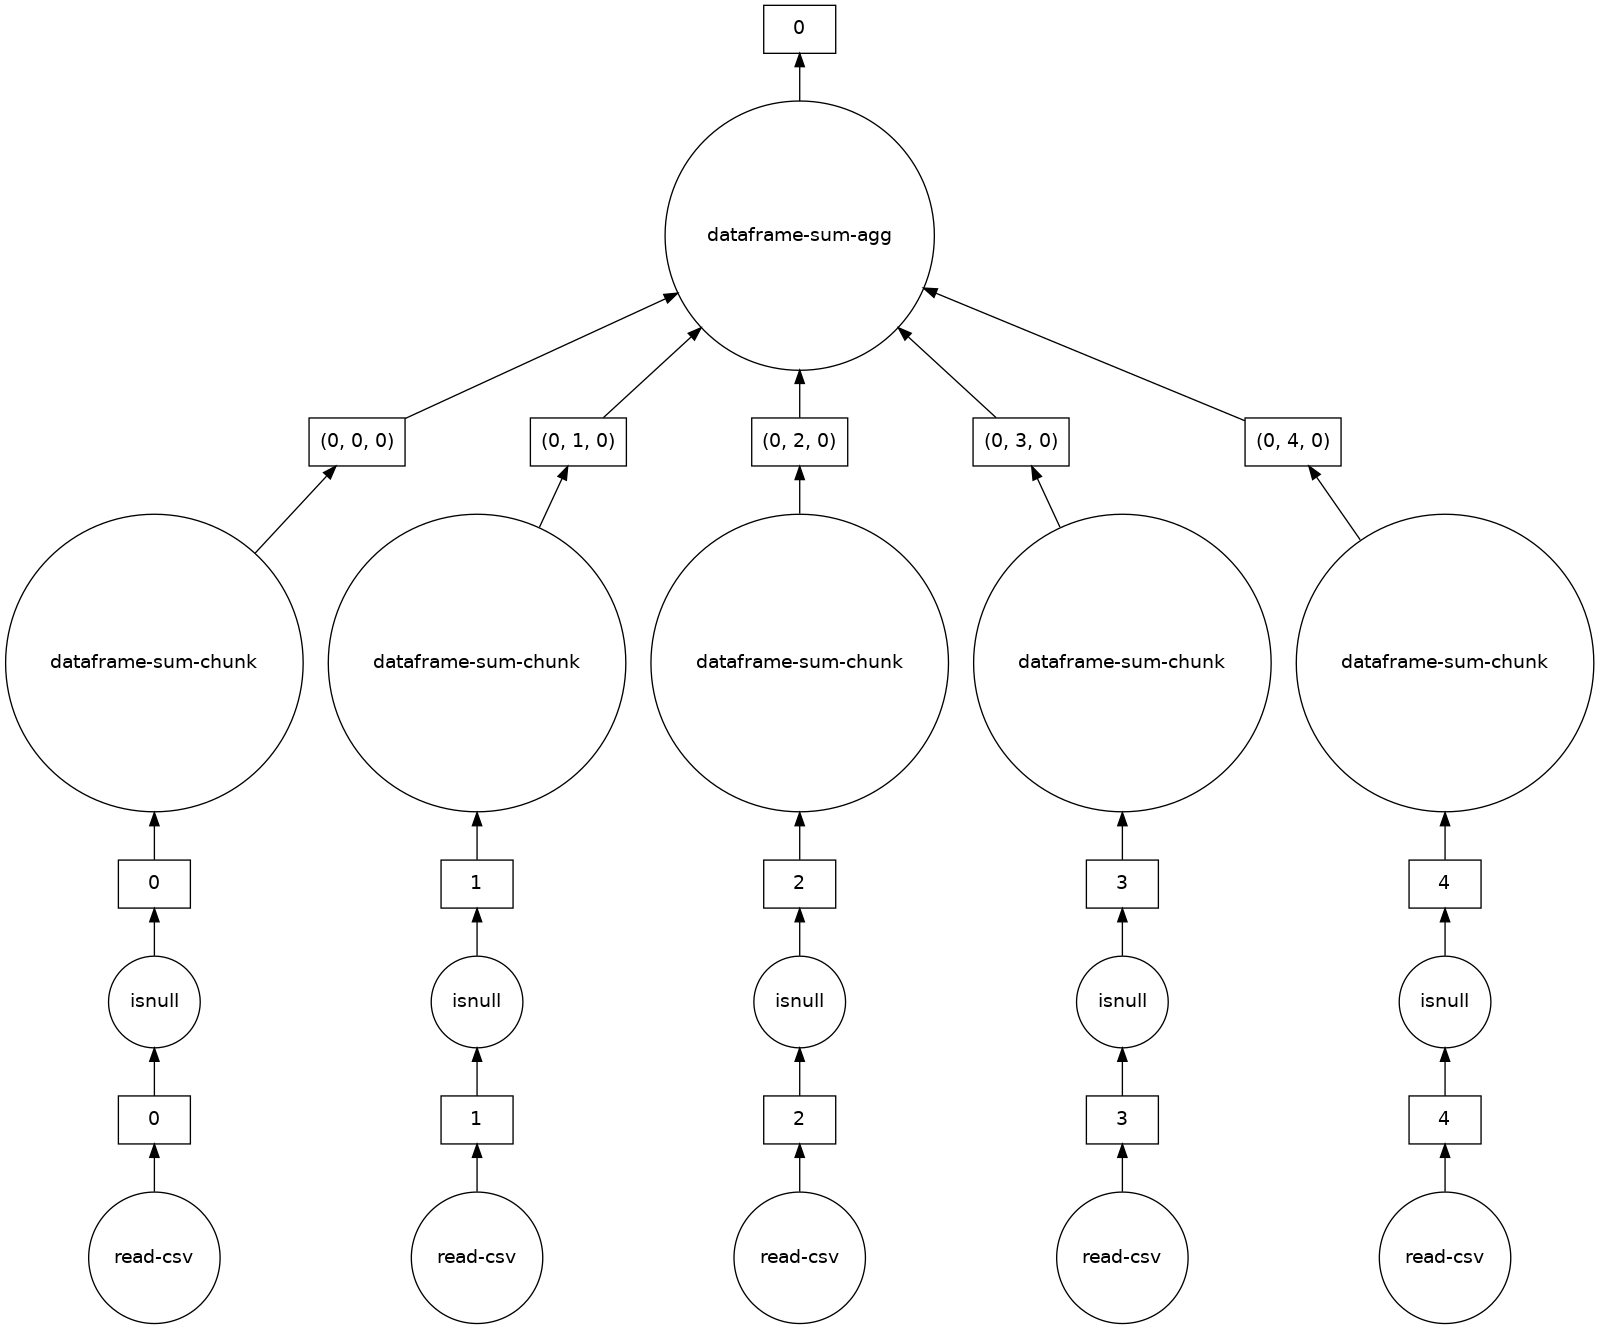

In [69]:
%%time
goodsale.isnull().sum().visualize()

In [71]:
goodsale.isnull().sum().compute()

data_date             0
goods_id              0
sku_id                0
goods_num             0
goods_price           0
orginal_shop_price    0
dtype: int64

In [97]:
%%time
goodsdaily=dd.read_csv("data/goodsdaily.csv",  dtype='unicode')

CPU times: user 31.2 ms, sys: 15.6 ms, total: 46.9 ms
Wall time: 22.3 ms


In [98]:
goodsdaily["data_date"]=dd.to_datetime(goodsdaily.data_date)

In [43]:
goodsdaily.compute().shape

(35201588, 7)

In [99]:
goodsdaily.head()

,data_date,goods_id,goods_click,cart_click,favorites_click,sales_uv,onsale_days
0,2017-08-23,G8OeZY,72,2,3,0,6
1,2017-08-23,Gjytr2,96,0,1,0,336
2,2017-08-23,GR0SgC,15,0,0,0,98
3,2017-08-23,GMkqxN,9,0,0,0,13
4,2017-08-23,GuRXYe,538,5,9,2,69


In [44]:
%%time
goodsinfo=dd.read_csv("data/goodsinfo.csv")

CPU times: user 62.5 ms, sys: 15.6 ms, total: 78.1 ms
Wall time: 115 ms


In [45]:
%%time
goodsinfo.compute().shape

CPU times: user 391 ms, sys: 188 ms, total: 578 ms
Wall time: 654 ms


(423452, 10)

In [46]:
goodsinfo.head()

,goods_id,cat_level1_id,cat_level2_id,cat_level3_id,cat_level4_id,cat_level5_id,cat_level6_id,cat_level7_id,goods_season,brand_id
0,GBLrYn,2,6,-1,-1,-1,-1,-1,0,0
1,G2OzvE,35,36,-1,-1,-1,-1,-1,6,74
2,GIa1pG,2,6500,4798,-1,-1,-1,-1,0,55
3,GR7cM4,31,50,-1,-1,-1,-1,-1,0,0
4,GRQgu3,2,6500,4798,-1,-1,-1,-1,2,31


In [100]:
%%time
marketing=dd.read_csv("data/marketing.csv", dtype='unicode')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.8 ms


In [48]:
marketing.compute().shape

(416, 3)

In [101]:
marketing["data_date"] = dd.to_datetime(marketing.data_date)

In [102]:
marketing.tail()

,data_date,marketing,plan
411,2018-05-31,5,3
412,2018-06-01,5,3
413,2018-06-02,5,3
414,2018-06-03,5,3
415,2018-06-04,5,3


In [64]:
%%time
submit_example=dd.read_csv("data/submit_example.csv")

CPU times: user 15.6 ms, sys: 31.2 ms, total: 46.9 ms
Wall time: 36.8 ms


In [65]:
submit_example.compute().shape

(104510, 6)

In [67]:
submit_example.tail()

,sku_id,week1,week2,week3,week4,week5
104505,SKteg3pG,0,0,0,0,0
104506,SKcE2nZk,0,0,0,0,0
104507,SKCjePQS,0,0,0,0,0
104508,SK0IHnm1,0,0,0,0,0
104509,SK4XSYtP,0,0,0,0,0


In [25]:
dask_files=dd.read_csv("data/*.csv")

In [26]:
dask_files

,data_date
npartitions=28,
,object
,...
...,...
,...
,...


In [29]:
dask_all_file=dd.read_csv(filenames, parse_dates={"Dates":[0]})

In [30]:
dask_all_file

,Dates
npartitions=28,
,datetime64[ns]
,...
...,...
,...
,...
